In [9]:
import pandas as pd

data = pd.read_excel(r'Figures_Data_PreparationBB_new.xlsx', sheet_name = 'Figure 8')


data.head()

data1 = data[["Pol_Inst","Technologie","Mean_Quantity_El_Price_Enduser"]]
#data1["Pol_Inst"]= data1["Pol_Inst"].replace("CO2_Cap", "CO\N{SUBSCRIPT TWO} Cap")
#data1["Pol_Inst"]= data1["Pol_Inst"].replace("CO2_Tax", "CO\N{SUBSCRIPT TWO} Tax")
data1

,Pol_Inst,Technologie,Mean_Quantity_El_Price_Enduser
0,CO2_Cap,Lignite,79.778527
1,CO2_Cap,Lignite,79.778527
2,CO2_Cap,Gas,75.831856
3,CO2_Cap,Gas,77.805192
4,CO2_Cap,Hardcoal,79.778527
...,...,...,...
143,FIT,Hardcoal,96.436821
144,FIT,Gas,96.638168
145,FIT,Gas,96.778080
146,FIT,Lignite,96.560668


In [10]:
data1["Pol_Inst"]= data1["Pol_Inst"].replace("Min_RES_Quota", "Min RES Quota")
data1["Technologie"]= data1["Technologie"].replace("Lignite", "Lignite Fuel Cost")
data1["Technologie"]= data1["Technologie"].replace("Gas", "Gas Fuel Cost")
data1["Technologie"]= data1["Technologie"].replace("Hard coal", "Hard coal Fuel Cost")
data1["Technologie"]= data1["Technologie"].replace("Solar", "PV Investment Cost")
data1["Technologie"]= data1["Technologie"].replace("Lit_Ion", "Li-Ion  Investment Cost")
data1["Technologie"]= data1["Technologie"].replace("Wind_Onshore", "Wind Onshore  Investment Cost")
data1["Technologie"]= data1["Technologie"].replace("Wind_Offshore", "Wind Offshore Investment Cost")
data1["Technologie"]= data1["Technologie"].replace("no", "Base Case")
data2 = data1.dropna()
capacity = data['Pol_Inst'].unique()
types = data['Technologie'].unique()
print(data2)

    Pol_Inst        Technologie  Mean_Quantity_El_Price_Enduser
0    CO2_Cap  Lignite Fuel Cost                       79.778527
1    CO2_Cap  Lignite Fuel Cost                       79.778527
2    CO2_Cap      Gas Fuel Cost                       75.831856
3    CO2_Cap      Gas Fuel Cost                       77.805192
4    CO2_Cap           Hardcoal                       79.778527
..       ...                ...                             ...
143      FIT           Hardcoal                       96.436821
144      FIT      Gas Fuel Cost                       96.638168
145      FIT      Gas Fuel Cost                       96.778080
146      FIT  Lignite Fuel Cost                       96.560668
147      FIT  Lignite Fuel Cost                       96.679576

[148 rows x 3 columns]


<ipython-input-10-114ffc5f1436>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Pol_Inst"]= data1["Pol_Inst"].replace("Min_RES_Quota", "Min RES Quota")
<ipython-input-10-114ffc5f1436>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Technologie"]= data1["Technologie"].replace("Lignite", "Lignite Fuel Cost")
<ipython-input-10-114ffc5f1436>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [11]:
#
hue1 = ["#9A7B5C", "#C7DADA", "#8D4D4D", "#FFF340", "#5A67FF", "#00B8F2", "#87CD5C", "#51B351", "#404040"]
capacity
types

data5=data2.query("Technologie == 'Base Case'")
data5

data2['Technologie'] = pd.Categorical(data2['Technologie'], [ 'Lignite Fuel Cost', 'Gas Fuel Cost', 'Hard coal Fuel Cost', 'PV Investment Cost', 'Wind Onshore Investment Cost',
       'Wind Offshore Investment Cost', 'Li-Ion Investment Cost', 'PSH Investment Cost', 'Demand'])
data2.sort_values("Technologie")

,Pol_Inst,Technologie,Mean_Quantity_El_Price_Enduser
0,CO2_Cap,Lignite Fuel Cost,79.778527
112,FIT,Lignite Fuel Cost,96.310849
111,FIT,Lignite Fuel Cost,96.181849
110,CO2_Tax,Lignite Fuel Cost,79.775864
109,CO2_Tax,Lignite Fuel Cost,79.775864
...,...,...,...
133,FIT,NaN,96.477810
136,FIT,NaN,97.483712
137,FIT,NaN,98.530603
142,FIT,NaN,96.436821


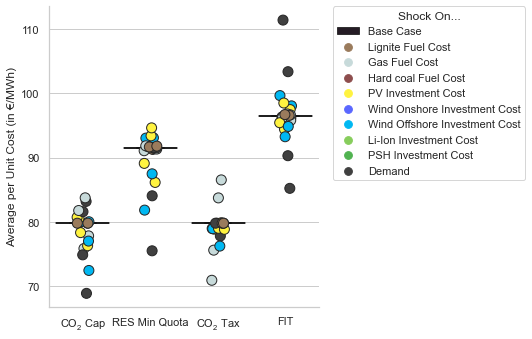

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(14.7,11.27)})
sns.set(style="whitegrid")
ax = sns.catplot(x="Pol_Inst",s = 10, y="Mean_Quantity_El_Price_Enduser", hue = "Technologie",linewidth=1, data=data2.query("Technologie != 'Base Case'"), palette = sns.color_palette(["#9A7B5C", "#C7DADA", "#8D4D4D", "#FFF340", "#5A67FF", "#00B8F2", "#87CD5C", "#51B351", "#404040"]))
sns.boxplot(x="Pol_Inst", y="Mean_Quantity_El_Price_Enduser",  hue= "Technologie", data=data5, palette = sns.color_palette(["#261a26"]))
ax.set(xlabel='', ylabel='Average per Unit Cost (in €/MWh)')
ax.set_xticklabels(rotation = 0)
#ax.set_xticklabels("CO\N{SUBSCRIPT TWO} Tax")
ax.set_xticklabels(labels=["$\mathregular{CO_{2}}$ Cap", "RES Min Quota", "$\mathregular{CO_{2}}$ Tax", "FIT"])
ax._legend.set_title("Shock on...")
ax._legend.remove()
#plt.ylim(-0.65,0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Shock On...");

In [14]:
import psutil
import requests
ax.savefig("images/figure8.svg")